# Colab

In [ ]:
from google.colab import auth, drive

auth.authenticate_user()
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 44.7MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


# NSMC : Naver Sentiment Movie Corpus (네이버 영화 리뷰 데이터)
네이버에서 제공하는 200,000 개의 영화 리뷰 데이터
- 긍정 리뷰 : 영화 평점 9점 이상
- 부정 리뷰 : 영화 평점 4점 이하
- 5-8점의 영화 리뷰들은 제외됨
- 출처 : https://github.com/e9t/nsmc

# 모듈 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import Okt, Komoran, Kkma

# 데이터 불러오기

In [ ]:
data = pd.read_csv("gdrive/My Drive/data/ratings.txt", sep = "\t") # 데이터 불러오기

# 데이터 확인하기

In [ ]:
data.head(10)
# id : 네이버 영화 리뷰의 식별번호
# document : 네이버 영화 리뷰 내용
# label : 긍정, 부정 레이블 (긍정 : 1, 부정 : 0)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print(data.shape) # 데이터 행과 열 개수 확인

(200000, 3)


# 결측값 확인 및 제거

In [ ]:
data.isnull().sum() # 각 열별 결측치 데이터 개수 확인

id          0
document    8
label       0
dtype: int64

In [ ]:
data[data['document'].isnull()] # 'document' 열의 결측치 데이터 확인

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [ ]:
notnull_data = data.dropna(axis = 0) # 결측치 열 제거
notnull_data.isnull().sum() # 제거 된 결과 확인

id          0
document    0
label       0
dtype: int64

In [ ]:
print(notnull_data.shape) # 결측치 열 제거 후 전체 데이터 행과 열 개수 확인 (8개 제거)

(199992, 3)


# 중복값 확인 및 제거

In [ ]:
notnull_data.duplicated(subset = ['document']).sum() # 'document' 열의 중복된 데이터 개수 확인

5449

In [ ]:
notnull_data[notnull_data.duplicated(subset = ['document'])] # 'document' 열의 중복된 데이터 확인

,id,document,label
187,3946738,굿,1
740,4217807,재밌다,1
1369,3044092,재밋다,1
1535,6924850,굿,1
1896,2417941,쵝오,1
...,...,...,...
199932,2334732,지루함...,0
199939,2105796,bad,0
199944,2100743,재미없다...,0
199946,735755,에혀,0


In [ ]:
notnull_data[notnull_data["document"].eq("재밌다")] # "재밌다" 에 해당되는 'document' 데이터 확인

,id,document,label
11,640794,재밌다,1
740,4217807,재밌다,1
1945,4248646,재밌다,1
3365,3513408,재밌다,1
6078,438156,재밌다,1
...,...,...,...
99124,7159030,재밌다,1
109311,4744165,재밌다,0
128729,6108948,재밌다,0
150097,6137250,재밌다,0


In [ ]:
notnull_data[notnull_data["document"].eq("재미 더럽게없다..")] # "재미 더럽게없다.." 에 해당되는 'document' 데이터 확인

,id,document,label
102354,7345248,재미 더럽게없다..,0
179240,7125895,재미 더럽게없다..,0
196015,4609944,재미 더럽게없다..,0
199362,7427273,재미 더럽게없다..,0
199966,7405830,재미 더럽게없다..,0


In [ ]:
unique_df = notnull_data.drop_duplicates(subset = ["document"]) # 'document' 열이 중복된 데이터 제거
unique_df.shape # 'document' 열이 중복된 데이터를 제거한 이후 데이터 행과 열 개수 확인 (5,449개 제거)
# 199992 - 5449 = 194543

(194543, 3)

In [ ]:
unique_df["preprocessed_document"] = unique_df["document"].str.replace("[^ㄱ-ㅣ가-힣]+","") # 한글과 띄어쓰기가 아닌 문자들을 제거
unique_df # 위에서 언급한 전처리 과정이 적용된 'preprocessed_document' 열 확인

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label,preprocessed_document
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,어릴때보고지금다시봐도재밌어요ㅋㅋ
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,안개자욱한밤하늘에떠있는초승달같은영화
...,...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0,포켓몬스터짜가ㅡㅡ
199996,3302770,쓰.레.기,0,쓰레기
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0,완전사이코영화마지막은더욱더이영화의질을떨어트린다
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0,왜난재미없었지ㅠㅠ라따뚜이보고나서스머프봐서그런가ㅋㅋ


# 영화 리뷰 데이터에 대해 문장 길이를 계산하고 시각화를 통해 데이터를 탐색

In [ ]:
unique_df["document_len"] = unique_df["preprocessed_document"].apply(lambda x: len(x)) # 'preprocessed_document' 리뷰들의 문장 길이를 계산하여 'document_len' 열로 저장

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'The Distribution of Length over the Movie Reviews')

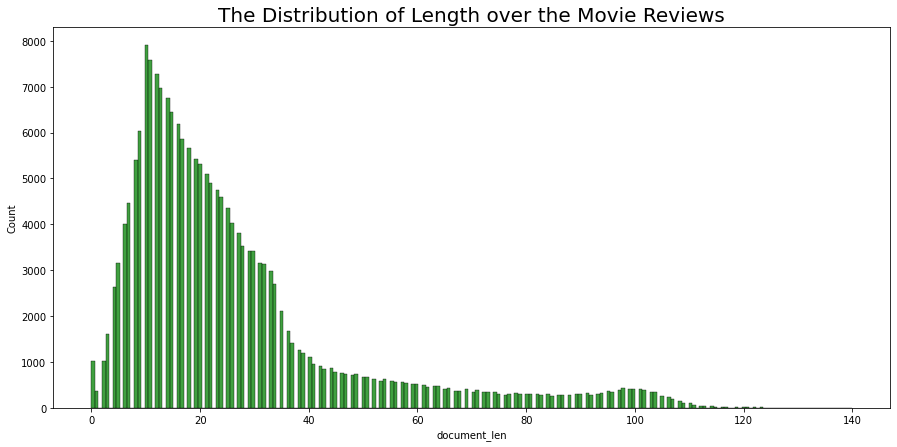

In [ ]:
plt.rcParams["figure.figsize"] = (15, 7) # 그래프 크기 지정
sns.histplot(unique_df["document_len"], color = "green") # 단일 변량 분포 그래프
plt.title("The Distribution of Length over the Movie Reviews", fontsize = 20) # 그래프 제목, 글자 크기는 20 지정

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


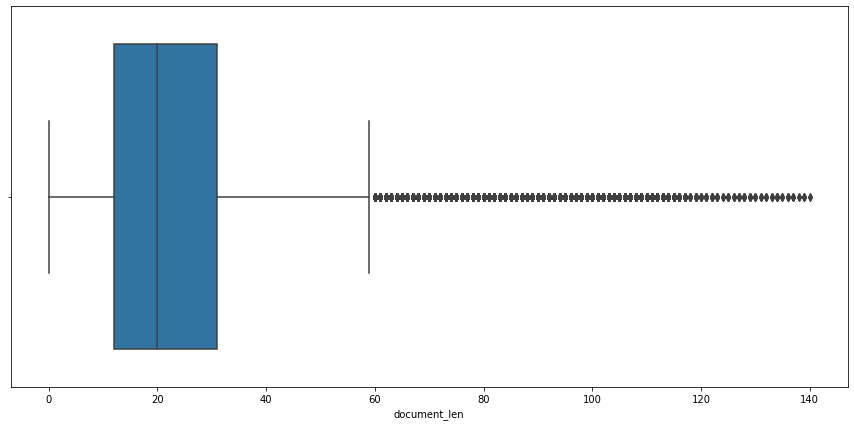

In [ ]:
sns.boxplot(unique_df["document_len"]) # 'document_len' 데이터 상자 그림 그리기

In [ ]:
unique_df["document_len"].describe() # 'document_len' 열의 통계량 확인 (1분위수, 3분위수)

count    194543.000000
mean         26.246557
std          21.895254
min           0.000000
25%          12.000000
50%          20.000000
75%          31.000000
max         140.000000
Name: document_len, dtype: float64

In [ ]:
unique_df["document_len"].describe()
num=unique_df[unique_df["document_len"]>60].count()
num

id                       16954
document                 16954
label                    16954
preprocessed_document    16954
document_len             16954
dtype: int64

In [ ]:
total=unique_df["document_len"].count()

In [ ]:
num/total*100
#절사평균 설명쓰기

id                       8.714783
document                 8.714783
label                    8.714783
preprocessed_document    8.714783
document_len             8.714783
dtype: float64

In [ ]:
import numpy as np
newindex=np.arange(194543)
newindex
unique_df['newindex']=newindex

In [ ]:
unique_df=unique_df.sort_values(by='document_len')

#unique_df.reindex(np.arange(16954))



In [ ]:
unique_df

,id,document,label,preprocessed_document,document_len
50289,10118564,ooh child things are gonna get easier,1,,0
29962,7981407,.................,1,,0
151210,2579718,What a trash piece !,0,,0
14487,4458771,mother fucker! oh shit!,1,,0
35203,7564535,ang?,1,,0
...,...,...,...,...,...
150625,7928616,리허설하긴함?생방송이벅차면대본대로하던가ㅋ영화더테러보는줄나까지급박해서ㅋ시간분배도안되있...,0,리허설하긴함생방송이벅차면대본대로하던가ㅋ영화더테러보는줄나까지급박해서ㅋ시간분배도안되있고...,139
187824,7928523,승리는에피소드준비햇다하면서엠씨들은주구장창스캔들얘기만물어보고또엠씨들이포장식으로하면서계...,0,승리는에피소드준비햇다하면서엠씨들은주구장창스캔들얘기만물어보고또엠씨들이포장식으로하면서계...,139
123894,7923683,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,139
128532,7767475,재미없다ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ...,0,재미없다ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ...,140


In [ ]:
unique_df.set_index('newindex')

,id,document,label,preprocessed_document,document_len
newindex,,,,,
0,10118564,ooh child things are gonna get easier,1,,0
1,7981407,.................,1,,0
2,2579718,What a trash piece !,0,,0
3,4458771,mother fucker! oh shit!,1,,0
4,7564535,ang?,1,,0
...,...,...,...,...,...
194538,7928616,리허설하긴함?생방송이벅차면대본대로하던가ㅋ영화더테러보는줄나까지급박해서ㅋ시간분배도안되있...,0,리허설하긴함생방송이벅차면대본대로하던가ㅋ영화더테러보는줄나까지급박해서ㅋ시간분배도안되있고...,139
194539,7928523,승리는에피소드준비햇다하면서엠씨들은주구장창스캔들얘기만물어보고또엠씨들이포장식으로하면서계...,0,승리는에피소드준비햇다하면서엠씨들은주구장창스캔들얘기만물어보고또엠씨들이포장식으로하면서계...,139
194540,7923683,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,139


In [ ]:
short_df = unique_df[:][int(round(total*0.087)):int(round(total*0.287))]
short_df

,id,document,label,preprocessed_document,document_len,newindex
79060,6022374,배우팝스타 최고,1,배우팝스타최고,7,16925
119643,148361,캠페인 동참 ㅋㅋ,0,캠페인동참ㅋㅋ,7,16926
169510,7661175,지나친 무리수다,0,지나친무리수다,7,16927
190797,7139310,이것도 영화라고;;;;,0,이것도영화라고,7,16928
25142,8066167,최고 인듯 하네요 !!!,1,최고인듯하네요,7,16929
...,...,...,...,...,...,...
24728,5127702,후반부로 갈수록 아쉬워는 영화,1,후반부로갈수록아쉬워는영화,13,55829
106714,9470067,댓글알바 때문에 1점 벨런스맞춤,0,댓글알바때문에점벨런스맞춤,13,55830
50132,9616988,브랜든대령님 겨론해주세여 ㅠ,1,브랜든대령님겨론해주세여ㅠ,13,55831
146602,10221286,개노잼영화는평점떨어트리기,0,개노잼영화는평점떨어트리기,13,55832


In [ ]:
long_df = unique_df[:][int(round(total*(1-0.2-0.087))):int(round(total*(1-0.087)))]
long_df

,id,document,label,preprocessed_document,document_len,newindex
167529,4124245,이런남자젤싫다 능력없이무작정쫓아다니는...말도안되는영화스토리,0,이런남자젤싫다능력없이무작정쫓아다니는말도안되는영화스토리,29,138709
76084,5109297,아이디어는 진부할지몰라도 실제 상황을 영화적으로 raw하게 잘 보여준듯,1,아이디어는진부할지몰라도실제상황을영화적으로하게잘보여준듯,29,138710
126820,8616786,"글쎄요:) 마지막엔 따뜻하고 짠했지만, 과정은 좋지않았다. 참 아쉬운 영화.",0,글쎄요마지막엔따뜻하고짠했지만과정은좋지않았다참아쉬운영화,29,138711
14534,4800088,가까운 것에 대한 소중함을 느끼지 못했던 나를 부끄럽게 만들어 주었다,1,가까운것에대한소중함을느끼지못했던나를부끄럽게만들어주었다,29,138712
120286,2992799,영화에서 재미를 빼면 어쩌란 거냐.. 아무리 블랙풍자코미디라곤 하지만..,0,영화에서재미를빼면어쩌란거냐아무리블랙풍자코미디라곤하지만,29,138713
...,...,...,...,...,...,...
89855,9730028,마지막에 송중기랑 박보영(할머니)이 서로 끌어안고카메라 옆으로 돌리는씬에서 박보영이...,1,마지막에송중기랑박보영할머니이서로끌어안고카메라옆으로돌리는씬에서박보영이젊었을적으로나오게...,61,177613
18310,9241082,내가 본 재난영화 중 제일 명작이라 생각되는 영화. 또 보통 2편 나오면 1편에 비...,1,내가본재난영화중제일명작이라생각되는영화또보통편나오면편에비해별론데이건편에는조금못미치지만...,61,177614
67031,9599582,이미 알고있는 역사에 흥미로운 주제를 곁들여 좋은 이야기를 만든 영화. 개개인의 캐...,1,이미알고있는역사에흥미로운주제를곁들여좋은이야기를만든영화개개인의캐릭터가매력있고특히이정재...,61,177615
162967,8575577,조자룡이 유비부인과 아들을 구하러 갈 당시 전혀 이름없던 병졸로 나오는게 말도 안된...,0,조자룡이유비부인과아들을구하러갈당시전혀이름없던병졸로나오는게말도안된다조자룡은그당시이미유...,61,177616


In [ ]:
subset_df = pd.concat([short_df, long_df], axis = 0) # 추출한 짧은 영화 리뷰 데이터와 긴 영화 리뷰 데이터를 병합
subset_df.shape 

(77818, 6)

# 한국어 형태소 분석기 적용하기
- 문장 및 단락들을 형태소, 품사 태깅, 문장 분리 등으로 다양하게 처리해주는 한국어 형태소 분석기 Konlpy
- 출처 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/

In [ ]:
okt = Okt() # 트위터에서 만든 오픈소스 한국어 형태소 분석기
komoran = Komoran() # Shineware 연구 동호회에서 개발한 자바 기반 형태소 분석기
kkma = Kkma() # 서울대학교 지능형 데이터 시스템 연구실에서 개발한 형태소 분석기

In [ ]:
okt_res = subset_df["preprocessed_document"][:10].apply(lambda x: okt.morphs(x)) # 10개 영화 리뷰에 대해 트위터 형태소 분석기를 적용
okt_res # 결과 확인

79060         [배우, 팝스타, 최고]
119643        [캠페인, 동참, ㅋㅋ]
169510        [지나친, 무리수, 다]
190797    [이, 것, 도, 영화, 라고]
25142       [최고, 인, 듯, 하네요]
119605    [중, 에, 제, 일, 쓰레기]
79225       [아가, 가, 귀엽, 귀엽]
119656    [요, 시, 그란, 도, 시즌]
135044    [만든, 이유, 가, 뭐, 야]
68279           [굳, ㅠㅠㅠㅠㅠㅠ]
Name: preprocessed_document, dtype: object

In [ ]:
komoran_res = subset_df["preprocessed_document"][:10].apply(lambda x: komoran.morphs(x)) # 10개 영화 리뷰에 대해 코모란 형태소 분석기를 적용하여 결과 확인
komoran_res # 결과 확인

79060          [배우, 팝, 스타, 최고]
119643               [캠페인동참ㅋㅋ]
169510        [지나치, ㄴ, 무리수, 다]
190797      [이것, 도, 영화, 이, 라고]
25142       [최고, 이, ㄴ듯, 하, 네요]
119605         [중, 에, 제일, 쓰레기]
79225      [아, 가가, 귀, 엽, 귀, 엽]
119656       [요시, 그, 란, 도, 시즌]
135044    [만들, ㄴ, 이, 유가, 뭐, 야]
68279                [굳ㅠㅠㅠㅠㅠㅠ]
Name: preprocessed_document, dtype: object

In [ ]:
kkma_res = subset_df["preprocessed_document"][:10].apply(lambda x: kkma.morphs(x)) # 10개 영화 리뷰에 대해 꼬꼬마 형태소 분석기를 적용하여 결과 확인
kkma_res # 결과 확인

KeyboardInterrupt: ignored

In [ ]:
from tqdm import tqdm
tqdm.pandas()
subset_df["okt_res"] = subset_df["preprocessed_document"].progress_apply(lambda x: okt.morphs(x))
subset_df["komoran_res"] = subset_df["preprocessed_document"].progress_apply(lambda x: komoran.morphs(x))

 43%|████▎     | 33252/77818 [02:30<04:52, 152.29it/s]

In [ ]:
subset_df

In [ ]:
subset_df.to_csv("gdrive/My Drive/data/preprocessed_ratings.csv") # subset_df 파일을 csv 형태로 저장